 # varying parameters that describe mini-halos and see the impact to the global signal

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import py21cmfast as  p21c

print(f"21cmFAST version is {p21c.__version__}")

def freq2z(f):
    return 1419.4697 / f  - 1.

def z2freq(z):
    return 1419.4697 / (z + 1.)

21cmFAST version is 3.0.0dev


This is an example to show how parameters of minihalos affect the 21-cm global signal in a box of "HII_DIM": 50 and "BOX_LEN": 100.

We keep other parameters fixed and vary one of following  by a factor of 0.1, 0.5, 2 and 10:

    pow(10, "F_STAR7_MINI")
    pow(10, "F_ESC7_MINI")
    pow(10, "L_X_MINI")
    1 - "F_H2_SHIELD"

Note that the reference model has 

    pow(10, "F_STAR7_MINI") = pow(10, "F_STAR10") / pow(1000,ALPHA_STAR) * 10 # 10 times enhancement
    pow(10, "F_ESC7_MINI" ) = pow(10, "F_ESC10" ) / pow(1000,ALPHA_ESC ) / 10 # 0.1 times enhancement to balance the 10 times enhanced Ngamma
    pow(10, "L_X_MINI"    ) = pow(10, "L_X")
    1 - "F_H2_SHIELD"  = 1

We also have a NOmini model where mini-halos are not included

Below are the default AstroParams:

In [11]:
p21c.AstroParams._defaults_

{'ALPHA_ESC': 0.0,
 'ALPHA_STAR': 0.5,
 'F_ESC10': -1.22184874962,
 'F_ESC7_MINI': -2.22184874962,
 'F_H2_SHIELD': 0.0,
 'F_STAR10': -1.25,
 'F_STAR7_MINI': -99,
 'HII_EFF_FACTOR': 30.0,
 'ION_Tvir_MIN': 4.69897,
 'L_X': 40.5,
 'L_X_MINI': 40.5,
 'M_TURN': 8.7,
 'NU_X_THRESH': 500.0,
 'N_RSD_STEPS': 20,
 'R_BUBBLE_MAX': None,
 'X_RAY_SPEC_INDEX': 1.0,
 'X_RAY_Tvir_MIN': None,
 't_STAR': 0.5}

default cosmological parameters:

In [12]:
p21c.CosmoParams._defaults_

{'OMb': 0.0486,
 'OMm': 0.3075,
 'POWER_INDEX': 0.97,
 'SIGMA_8': 0.82,
 'hlittle': 0.6774}

In [2]:
# defining the variables

# Fstarm10 is 10**F_ESC7_MINI * 1000**ALPHA_STAR
# Fescm is 10**F_ESC7_MINI
# Lx is L_X_MINI
# SS is F_H2_SHIELD
folders_Fstarm10 = [{'Fstarm10': '1e-19', 'Fescm': '1e-19', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.05623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.28117066255', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '1.1246826502', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '5.623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0'}]

folders_Fescm    = [{'Fstarm10': '1e-19', 'Fescm': '1e-19', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.0006', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.003', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.012', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.06', 'Lx': '40.5', 'SS': '0.0'}]

folders_Lx       = [{'Fstarm10': '1e-19', 'Fescm': '1e-19', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '39.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.1989700043', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.8010299957', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '41.5', 'SS': '0.0'}]

folders_SS       = [{'Fstarm10': '1e-19', 'Fescm': '1e-19', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.0'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.9'},
                    {'Fstarm10': '0.5623413251', 'Fescm': '0.006', 'Lx': '40.5', 'SS': '0.5'}]


linestyles      = ['-', '-',':','-.','-.',':']
colors          = ['gray','black','#e41a1c','#377eb8','#e41a1c','#377eb8']#'#4daf4a','#984ea3','#ff7f00','#a65628','#f781bf','#999999']*4
lws             = [1,3,2,2,2,2]

folderss = [folders_Fstarm10, folders_Fescm, folders_Lx, folders_SS]
labelss = [['NOmini', 'reference', 'x0.1', 'x0.5', 'x2', 'x10'],] * len(folderss)
textss   = ['varying '+r'$f_{*,7}^{\rm mol}$',\
            'varying '+r'$f_{\rm esc}^{\rm mol}$',\
            'varying '+r'$L_{\rm x}^{\rm mol}$',\
            'varying '+r'$1-f_{\rm H_2}^{\rm shield}$']

# running and plotting the global signal

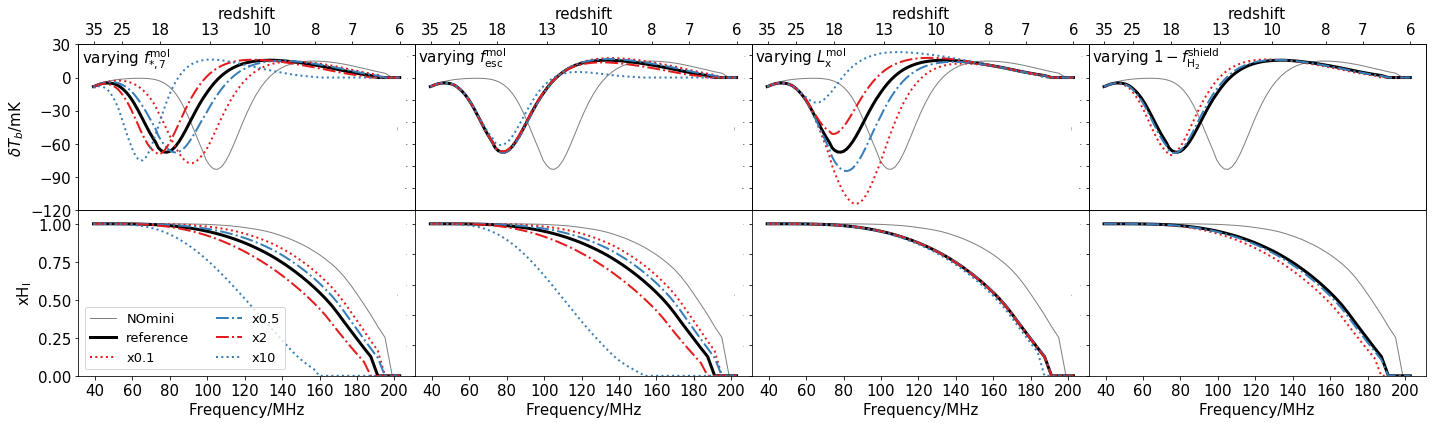

In [3]:
fig, axss = plt.subplots(2, len(folderss), sharex=True,figsize=(5*len(folderss),6))

initial_conditions = p21c.initial_conditions(user_params = {"HII_DIM": 50, "BOX_LEN": 100, 'USE_FFTW_WISDOM':True},random_seed=1994)

for pp, folders in enumerate(folderss):
    labels = labelss[pp]
    texts  = textss[pp]
    axs    = axss[:,pp]
    for kk, folder_param in enumerate(folders):
        F_STAR7_MINI = np.log10(float(folder_param['Fstarm10'])) - 1.5
        F_ESC7_MINI  = np.log10(float(folder_param['Fescm']))
        L_X_MINI     = float(folder_param['Lx'])
        F_H2_SHIELD  = float(folder_param['SS'])
                                       
        lightcone = p21c.run_lightcone(
            redshift = 6.0,
            max_redshift = 30.0,
            init_box = initial_conditions,
            flag_options = {"INHOMO_RECO":True, 'USE_MASS_DEPENDENT_ZETA':True, 'USE_TS_FLUCT':True},
            astro_params = {'F_STAR7_MINI': F_STAR7_MINI,'F_ESC7_MINI': F_ESC7_MINI, 'L_X_MINI': L_X_MINI, 'F_H2_SHIELD': F_H2_SHIELD},
            random_seed = 1994
        )
        freqs = z2freq(np.array(lightcone.node_redshifts))
        axs[0].plot(freqs, lightcone.global_brightness_temp, color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])
        axs[1].plot(freqs, lightcone.global_xHI,             color=colors[kk],linestyle=linestyles[kk], label = labels[kk],lw=lws[kk])

    axs[0].text(0.01, 0.99, texts,horizontalalignment='left',verticalalignment='top',
                        transform=axs[0].transAxes,fontsize = 15)

    axs[1].set_ylim(0.,1.09)
    axs[0].set_ylim(-120,30)
    axs[1].set_xlabel('Frequency/MHz',fontsize=15)
    axs[1].xaxis.set_tick_params(labelsize=15)

    zlabels = np.array([ 6,  7,  8,  10, 13, 18, 25, 35])
    ax2 = axs[0].twiny()
    ax2.set_xlim(axs[0].get_xlim())
    ax2.set_xticks(z2freq(zlabels))
    ax2.set_xticklabels(zlabels.astype(np.str)) 
    ax2.set_xlabel("redshift",fontsize=15)
    ax2.xaxis.set_tick_params(labelsize=15)
    ax2.grid(False)
    
    if pp == 0:
        axs[1].legend(loc='lower left', ncol=2,fontsize=13,fancybox=True,frameon=True)
        axs[0].set_yticks([-120,-90, -60, -30, 0, 30])
        axs[1].set_ylabel(r'${\rm xH_I}$',fontsize=15)
        axs[0].set_ylabel(r'$\delta T_b/{\rm mK}$',fontsize=15)
        axs[0].yaxis.set_tick_params(labelsize=15)
        axs[1].yaxis.set_tick_params(labelsize=15)
    else:
        axs[1].set_ylabel(r'${\rm xH_I}$',fontsize=0)
        axs[0].set_ylabel(r'$\delta T_b/{\rm mK}$',fontsize=0)
        axs[0].yaxis.set_tick_params(labelsize=0)
        axs[1].yaxis.set_tick_params(labelsize=0)
    
plt.tight_layout()
fig.subplots_adjust(hspace = 0.0,wspace=0.0)